<a href="https://colab.research.google.com/github/firman-hoerulloh/python_AnalysisDataIndianLiverPatientDataset-ILPD-nt/blob/main/Project_Based_Assignment_CLO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Firman Hoerulloh - 1301213392
2. Gregorius Marcelino - 1301213483
3. Reza Mu'ammar Widyanto - 1301210513

#### Latar Belakang
Kematian akibat sirosis hati terus meningkat, mengingat peningkatan tingkat konsumsi alkohol, infeksi hepatitis kronis, dan penyakit hati yang berhubungan dengan obesitas. Terlepas dari tingginya angka kematian akibat penyakit ini, penyakit hati tidak mempengaruhi semua sub-populasi secara merata. Deteksi dini patologi merupakan penentu hasil akhir pasien, namun pasien wanita tampaknya terpinggirkan dalam hal diagnosis dini patologi hati.

Dataset yang digunakan adalah ILPD (Indian Liver Patient Dataset). Dataset ini merupakan dataset yang memiliki informasi terkait pasien yang memiliki penyakit hati, dengan rincian 11 fitur dan 584 catatan pasien yang dikumpulkan dari Timur Laut Andhra Pradesh, India.


# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
# Baca dataset
df1 = pd.read_csv('dataset/indian_liver_patient.csv')
# Melihat 5 baris pertama
print(df1.head())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

In [ ]:
# Melihat informasi dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


# Exploration Data Analysis

In [ ]:
# Periksa nilai yang hilang
print(df1.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


** 4 nilai yang hilang dalam Albumin_and_Globulin_Ratio.**



In [ ]:
# Mengganti nilai yang hilang dengan rata-ratanya
df=df1.fillna(df1.mean())
df.head()

<ipython-input-71-fc3a88874ccd>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df1.fillna(df1.mean())


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
# Memeriksa tipe data dari setiap kolom
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
# Mengubah kolom Gender (jenis kelamin) menjadi angka, sehingga jenisnya berubah
df.Gender = df.Gender.replace(['Male'],'3')
df.Gender = df.Gender.replace(['Female'],'4')
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,4,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,3,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,3,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [ ]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
# Mengubah tipe data Gender (jenis kelamin)
df.Gender = df.Gender.astype('int64')
df.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [ ]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

Dataset berisi Jumlah Pasien Hati yang lebih tinggi (1 = terkena penyakit dan 2 = sehat)

In [ ]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
Albumin_and_Globulin_Ratio,-0.216089,0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


<Axes: >

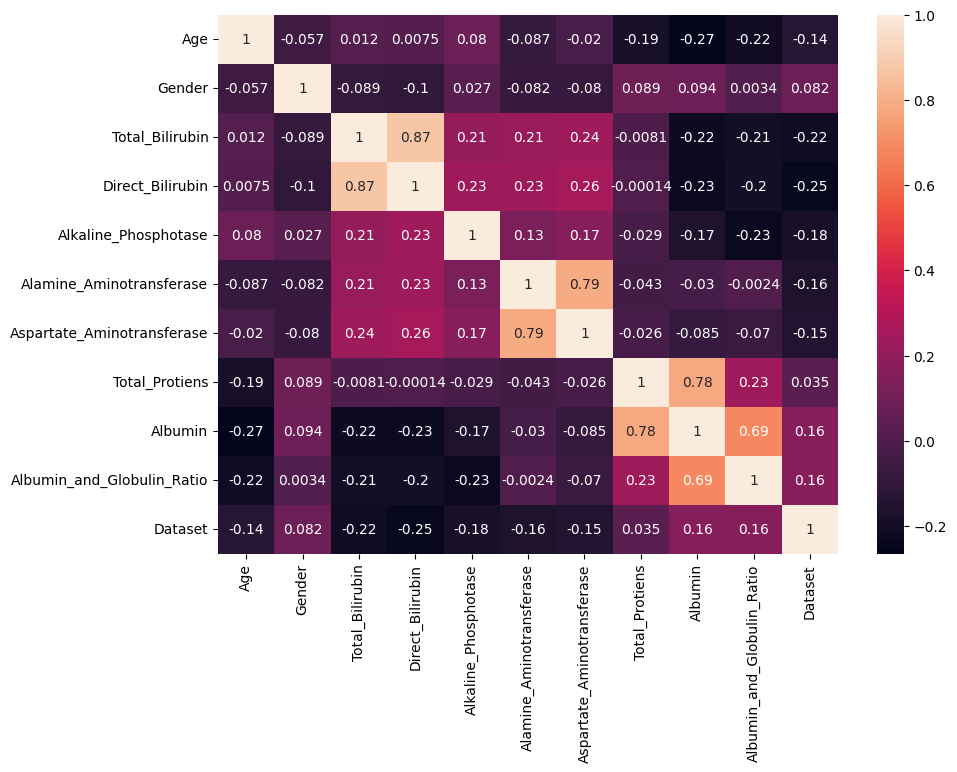

In [ ]:
# Heatmap
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),annot=True)

Dari heatmap Direct_Bilirubin & Total_Bilirubin, Alanine_Aminotransferase & Aspartate_Aminotransferase, Albumin & Total_Protiens adalah fitur yang sangat berkorelasi

In [ ]:
df.corr().Dataset

Age                          -0.137351
Gender                        0.082416
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Alkaline_Phosphotase         -0.184866
Alamine_Aminotransferase     -0.163416
Aspartate_Aminotransferase   -0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.162319
Dataset                       1.000000
Name: Dataset, dtype: float64

Dari output di atas, kita dapat melihat bahwa beberapa fitur seperti "Total_Bilirubin", "Direct_Bilirubin" memiliki korelasi negatif yang cukup kuat dengan kolom target "Dataset". Hal ini berarti bahwa pasien dengan nilai yang lebih tinggi pada fitur-fitur tersebut mungkin lebih cenderung menderita penyakit.

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,4,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,3,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,3,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,3,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3,3.9,2.0,195,27,59,7.3,2.4,0.40,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>],
       [<Axes: title={'center': 'Direct_Bilirubin'}>,
        <Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>],
       [<Axes: title={'center': 'Aspartate_Aminotransferase'}>,
        <Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>,
        <Axes: title={'center': 'Dataset'}>, <Axes: >]], dtype=object)

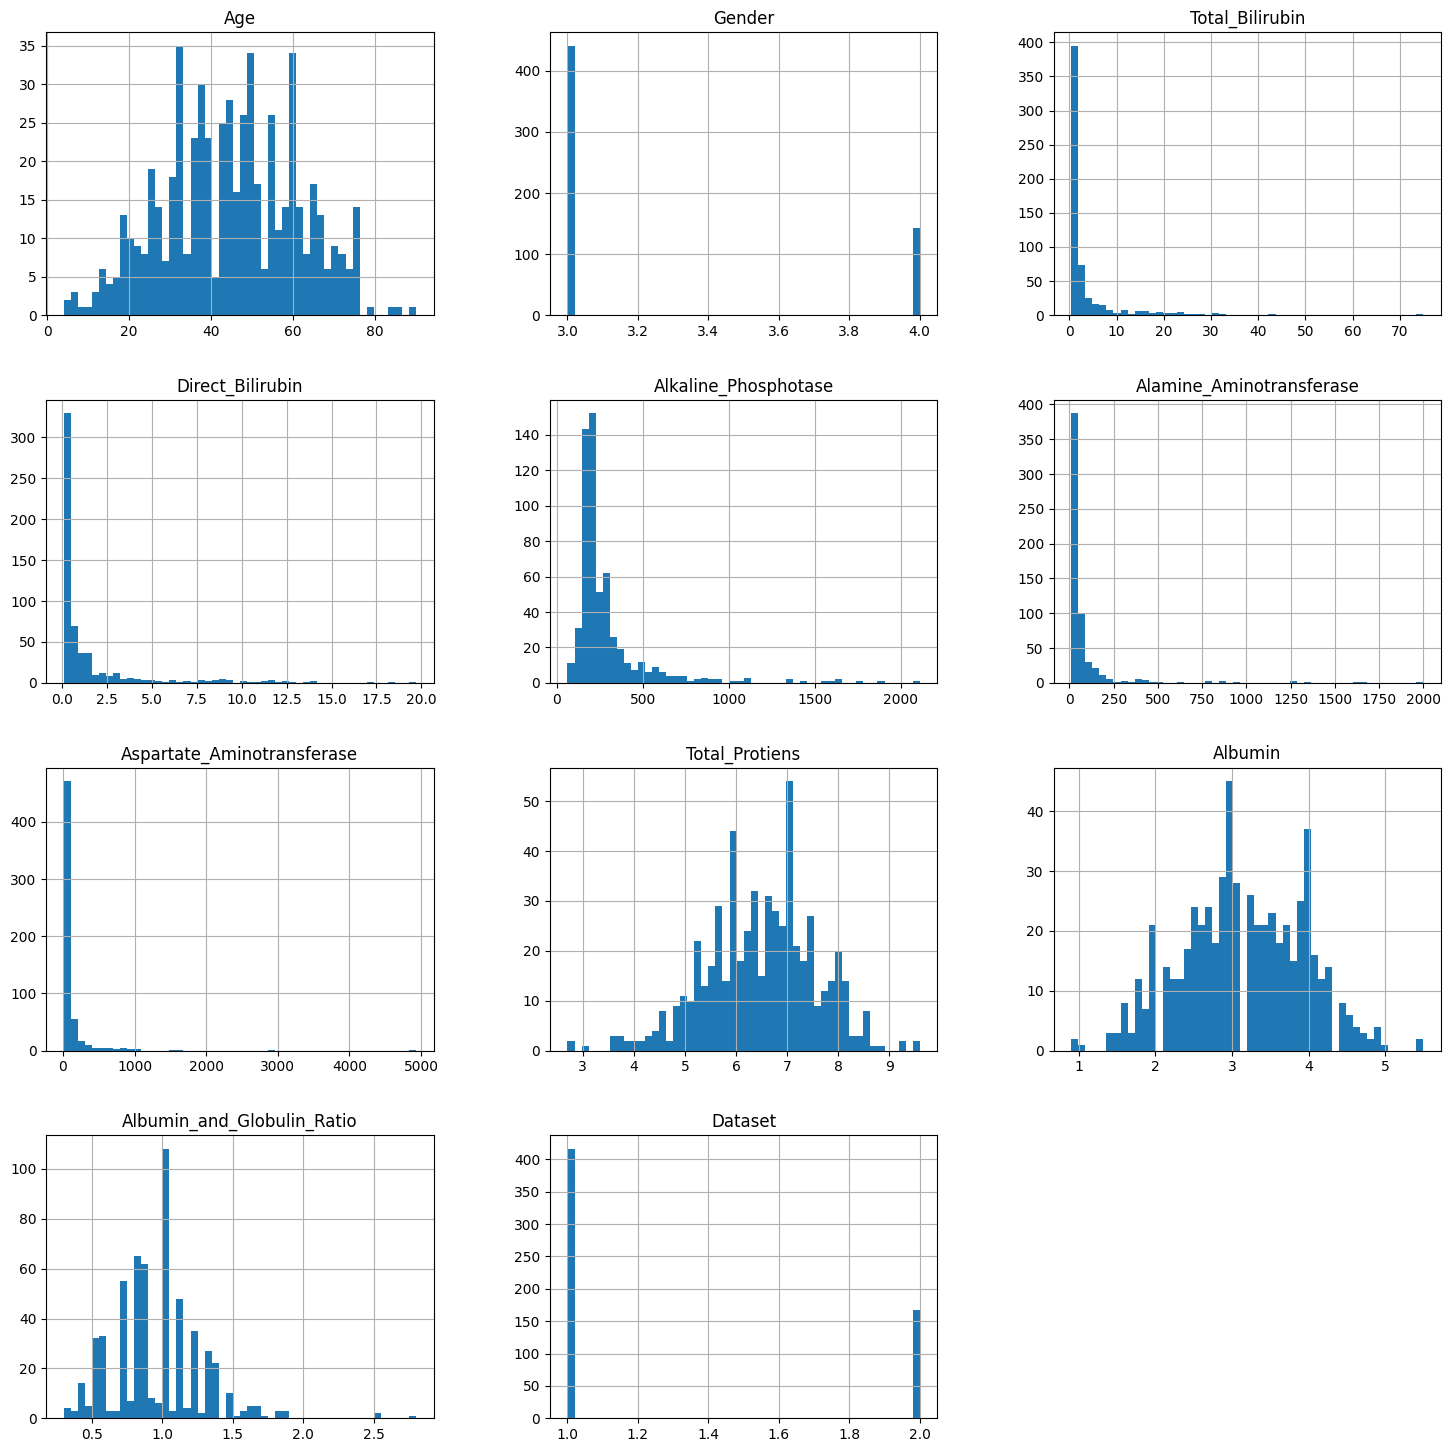

In [ ]:
df.hist(bins=50, figsize=(18,18))

# Analisis fitur

In [ ]:
# menghitung frekuensi kemunculan setiap nilai unik dalam kolom "Age"
df.Age.value_counts()

60    34
45    25
50    23
42    21
38    21
      ..
78     1
11     1
67     1
10     1
90     1
Name: Age, Length: 72, dtype: int64

<ipython-input-84-550510f13c26>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


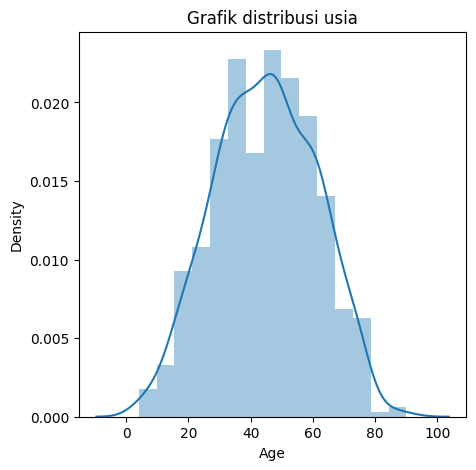

In [ ]:
# Grafik distribusi usia
sns.distplot(df['Age'])
plt.title('Grafik distribusi usia')
plt.show()


**Sebagian besar pasien berusia antara 45 hingga 60 tahun**

In [ ]:
DG=df.Gender.value_counts()
DG

3    441
4    142
Name: Gender, dtype: int64

Jumlah pria dalam dataset: 441

Jumlah wanita dalam dataset: 142


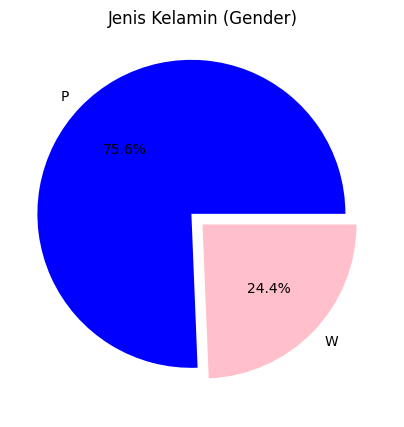

In [ ]:
# Diagram lingkaran untuk evaluasi kolom Gender
rcParams['figure.figsize'] = 5,5

plt.pie(DG,[0.1,0],colors=['blue','pink'],labels=['P','W'],autopct='%1.1f%%')
plt.title("Jenis Kelamin (Gender)")
plt.show()

**Pria berisiko lebih tinggi terkena penyakit hati dibandingkan dengan Wanita.**

In [ ]:
# Evaluasi kolom Dataset (Terkena Penyakit/Tidak)
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

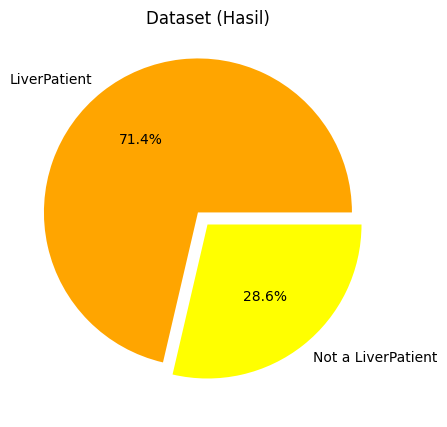

In [ ]:
# Diagram lingkaran untuk kolom Dataset (Penyakit/Tidak)
plt.pie(df.Dataset.value_counts(),[0.1,0],colors=['orange','yellow'],labels=['LiverPatient','Not a LiverPatient'],autopct="%1.1f%%")
plt.title("Dataset (Hasil)")
plt.show()

**Jumlah Pasien Hati: 416**

**Jumlah bukan Pasien Hati: 167**

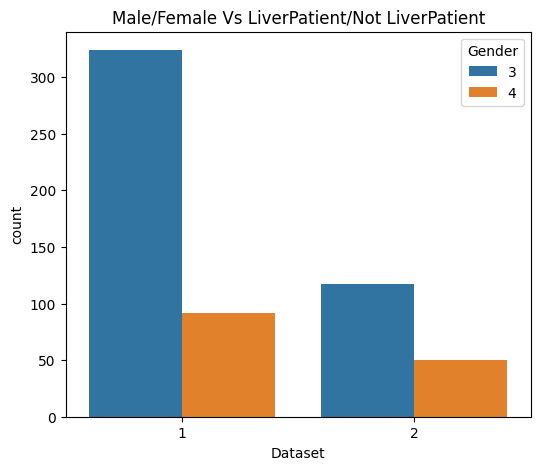

In [ ]:
# Countplot untuk Gender (Jenis Kelamin) dan Dataset (Penyakit/Tidak)
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()

countplot_of_2('Dataset','Gender','Male/Female Vs LiverPatient/Not LiverPatient')

**Berdasarkan countplot pasien yang memiliki penyakit hati maupun tidak memiliki penyakit hati kebanyakan berjenis kelamin Pria/laki-laki **

# **Training Model**

#### Ringkasan Metode

Random Forest adalah algoritma pembelajaran mesin yang populer yang digunakan untuk tugas klasifikasi, regresi, dan pilihan lainnya dalam pembelajaran supervisi. Random Forest memanfaatkan ide dari "hutan keputusan" (ensemble of decision trees) untuk membuat prediksi yang lebih akurat daripada pohon keputusan tunggal.

Pada kali ini kami membuat 4 model diantaranya:
1. Baseline Model (Default): Menggunakan hyperparameter default dari Random forest
2. Model 1 (High Estimators): Meningkatkan jumlah pohon keputusan (n_estimators)
3. Model 2 (Low Max Depth): Pengaturan kedalaman maksimum yang relatif rendah untuk setiap pohon keputusan dalam ensamble Random Forest (max_depth)
4. Model 3 (Low Max Features): Pengaturan jumlah fitur maksimum yang dipertimbangkan (max_features)

In [ ]:
# Membangun model klasifikasi
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
# menghitung koefisien korelasi antara setiap fitur dalam dataset (kecuali kolom "Dataset") dengan kolom "Dataset"
df.drop("Dataset", axis=1).apply(lambda x: x.corr(df['Dataset']))

Age                          -0.137351
Gender                        0.082416
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Alkaline_Phosphotase         -0.184866
Alamine_Aminotransferase     -0.163416
Aspartate_Aminotransferase   -0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.162319
dtype: float64

Dari output di atas, kita dapat melihat bahwa beberapa fitur memiliki korelasi positif dengan kolom target "Dataset" (seperti "Albumin" dan "Albumin_and_Globulin_Ratio"), sementara fitur lainnya memiliki korelasi negatif (seperti "Total_Bilirubin" dan "Direct_Bilirubin").

In [ ]:
# Mendefinisikan variabel fitur dan target.
# Memisahkan dataset ke dalam variabel fitur (x) dan target (y).
X = df.drop('Dataset', axis=1)
y = df['Dataset']

*   Variabel x akan berisi semua fitur dari dataset tanpa kolom target "Dataset".
*   Variabel y akan berisi kolom target "Dataset", yang berisi label atau kategori yang akan diprediksi oleh model.



In [ ]:
# Membagi data latih dan data uji
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

Kami membagi pelatihan dan pengujian dengan rasio 70 untuk pelatihan dan 30 untuk pengujian.

In [ ]:
# Baseline Model (Default)
baseline = RandomForestClassifier(random_state=21)
baseline.fit(X_train, y_train)
predictions_baseline = baseline.predict(X_test)
bl = accuracy_score(y_test, predictions_baseline)
print("\nBaseline Model (Default) Results:")
print("Akurasi:", bl)
print("Laporan Klasifikasi:\n", classification_report(y_test, predictions_baseline))


Baseline Model (Default) Results:
Akurasi: 0.8057142857142857
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.85      0.92      0.88       137
           2       0.58      0.39      0.47        38

    accuracy                           0.81       175
   macro avg       0.71      0.66      0.67       175
weighted avg       0.79      0.81      0.79       175



In [ ]:
# Model Exploration (at least 3 scheme)

# Skema 1: Jumlah Pohon yang Banyak
model1 = RandomForestClassifier(n_estimators=200, random_state=21)
model1.fit(X_train, y_train)
predictions_model1 = model1.predict(X_test)
m1 = accuracy_score(y_test, predictions_model1)
print("\nModel 1 (High Estimators) Results:")
print("Akurasi:", m1)
print("Laporan Klasifikasi:\n", classification_report(y_test, predictions_model1))

# Skema 2: Kedalaman Pohon yang Terbatas (max_depth Rendah)
model2 = RandomForestClassifier(max_depth=5, random_state=21)
model2.fit(X_train, y_train)
predictions_model2 = model2.predict(X_test)
m2 = accuracy_score(y_test, predictions_model2)
print("\nModel 2 (Low Max Depth) Results:")
print("Akurasi:", m2)
print("Laporan Klasifikasi:\n", classification_report(y_test, predictions_model2))

# Skema 3: Fitur yang Dibatasi (max_features Kecil)
model3 = RandomForestClassifier(max_features=2, random_state=21)
model3.fit(X_train, y_train)
predictions_model3 = model3.predict(X_test)
m3 = accuracy_score(y_test, predictions_model3)
print("\nModel 3 (Low Max Features) Results:")
print("Akurasi:", m3)
print("Laporan Klasifikasi:\n", classification_report(y_test, predictions_model2))



Model 1 (High Estimators) Results:
Akurasi: 0.7885714285714286
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.84      0.90      0.87       137
           2       0.52      0.39      0.45        38

    accuracy                           0.79       175
   macro avg       0.68      0.65      0.66       175
weighted avg       0.77      0.79      0.78       175


Model 2 (Low Max Depth) Results:
Akurasi: 0.7714285714285715
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.83      0.88      0.86       137
           2       0.47      0.37      0.41        38

    accuracy                           0.77       175
   macro avg       0.65      0.63      0.63       175
weighted avg       0.75      0.77      0.76       175


Model 3 (Low Max Features) Results:
Akurasi: 0.7828571428571428
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.83      0.88 

In [ ]:
# Evaluation
results= [['Baseline Model', bl], ['Model 1', m1], ['Model 2', m2],['model 3', m3]]

Liverpatient_predi= pd.DataFrame(results, columns = ['classification models', 'accuracy_score'])
Liverpatient_predi



,classification models,accuracy_score
0,Baseline Model,0.805714
1,Model 1,0.788571
2,Model 2,0.771429
3,model 3,0.782857


<Axes: title={'center': 'Classification models & accuracy scores'}, xlabel='classification models', ylabel='accuracy_score'>

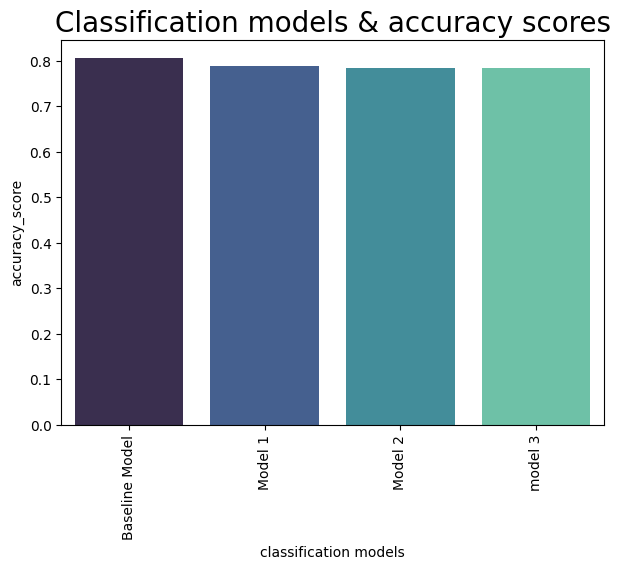

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores',fontsize=20)
sns.barplot(x="classification models", y="accuracy_score",  data=Liverpatient_predi,palette = "mako")

#### Hasil dan Analisis
1. Baseline Model (Default)

  Akurasi: 80.57%

  Analisis:
  *   Model dasar ini memberikan akurasi yang relatif tinggi, yaitu sekitar 80.57%.
  *   Precision untuk kelas 1 (pasien dengan penyakit) adalah 85%, yang menunjukkan bahwa model cenderung baik dalam mengidentifikasi pasien yang sebenarnya menderita penyakit.
  *   Namun, recall untuk kelas 2 (pasien tanpa penyakit) adalah 39%, yang berarti model kurang efektif dalam mengidentifikasi pasien yang sebenarnya tidak menderita penyakit.

2. Model 1 (High Estimators)

  Akurasi: 78.86%

  Analisis:

  *   Meskipun menggunakan lebih banyak pohon keputusan (high estimators), model ini memberikan akurasi yang sedikit lebih rendah dibandingkan baseline.
  *   Ada penurunan dalam recall untuk kelas 2, yang berarti model kurang efektif dalam mengidentifikasi pasien yang tidak menderita penyakit dibandingkan baseline.

3. Model 2 (Low Max Depth)

  Akurasi: 77.14%

  Analisis:

  *   Dengan membatasi kedalaman maksimum pohon (Low Max Depth), model ini menunjukkan penurunan akurasi lebih lanjut.
  *   Sama seperti model 1, recall untuk kelas 2 juga rendah, menunjukkan kesulitan model dalam mengidentifikasi pasien yang tidak menderita penyakit.
  
4. Model 3 (Low Max Features)

  Akurasi: 78.29%

  Analisis:

  *   Memilih sedikit fitur untuk setiap pohon dengan mengatur "Low Max Features" tidak menghasilkan perubahan yang signifikan dalam akurasi dibandingkan baseline.
  *   Namun, seperti model lainnya, recall untuk kelas 2 tetap rendah, menunjukkan kesulitan model dalam mengidentifikasi pasien yang tidak menderita penyakit.





#### Kesimpulan


*   Model dasar (baseline) menunjukkan performa yang relatif baik, tetapi masih ada ruang untuk perbaikan khususnya dalam mengidentifikasi pasien yang tidak menderita penyakit.
*   Semua skema memberikan hasil yang serupa secara umum, dengan akurasi di sekitar 77-78%.
*   Meskipun teknik pengoptimalan seperti peningkatan estimators, pengurangan kedalaman, dan pengurangan fitur telah dicoba, mereka belum berhasil meningkatkan performa model dalam mengenali pasien dengan penyakit.
*   Ada kebutuhan untuk lebih jauh menggali dan mungkin menggunakan teknik-teknik pengoptimalan lain atau pendekatan yang berbeda untuk meningkatkan kinerja model pada dataset ini.






